In [151]:
#Dependencies setup
import pandas as pd
import matplotlib.pyplot as plt
import requests
import scipy.stats as st
import numpy as np
import scipy.stats as linregress
#from scipy import stats

#incorporate citipy to populate cities
from citipy import citipy

#Import API Key
from config import api_key


In [152]:
# a set will only allo unique entries so we can ensure cities are unique
cities=set()

# ensure loop runs until len of set is exactly 700 cities
while len(cities) < 700:
    # Identify nearest city for a random latitude, lonngtitue coorinate
    lat = np.random.randint(-90, 90)
    lon = np.random.randint(-180, 180)
    city = citipy.nearest_city(lat, lon)
#     countries = citipy.nearest_city(lat, lon).country_code
    cities.add(f'{city.city_name},{city.country_code}')

    
# Print the city count to confirm sufficient count
cities

{'abancay,pe',
 'aberdeen,us',
 'abonnema,ng',
 'abu samrah,qa',
 'acapulco,mx',
 'acarau,br',
 'adelaide,za',
 'adria,it',
 'adzope,ci',
 'aguimes,es',
 'ahipara,nz',
 'ahuimanu,us',
 'ailigandi,pa',
 'airai,pw',
 'aklavik,ca',
 'aksarka,ru',
 'aksu,cn',
 'aksu,kz',
 'aktas,kz',
 'albany,au',
 'aldan,ru',
 'aljezur,pt',
 'almeria,es',
 'alofi,nu',
 'along,in',
 'alugan,ph',
 'ambilobe,mg',
 'ambodifototra,mg',
 'amderma,ru',
 'amga,ru',
 'amuntai,id',
 'anadyr,ru',
 'ancud,cl',
 'anloga,gh',
 'antri,in',
 'antsohihy,mg',
 'anuchino,ru',
 'argentan,fr',
 'arica,cl',
 'aripuana,br',
 'arlit,ne',
 'arraial do cabo,br',
 'artyk,ru',
 'asau,tv',
 'asbe teferi,et',
 'ascension,mx',
 'ashland,us',
 'aswan,eg',
 'atagay,ru',
 'atar,mr',
 'attawapiskat,ca',
 'atuona,pf',
 'autun,fr',
 'avarua,ck',
 'avera,pf',
 'axim,gh',
 'ayagoz,kz',
 'aykhal,ru',
 'azimur,ma',
 'bacuit,ph',
 'baghdad,iq',
 'bahile,ph',
 'baie-comeau,ca',
 'balabac,ph',
 'balimo,pg',
 'balkhash,kz',
 'bambanglipuro,id',
 'ba

In [153]:
# Perform API Calls
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it'sbeing processed (with the city number and city name).

# Loop through the list of cities and perform a request for data on each
units = "imperial"
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q="

# track list of lists to create data frame
cities_for_df = []
lat = []
lon = []
temp_max = []
humidity = []
cloudiness = []
wind_speed = []
countries = []
date = []

for i, city in enumerate(cities):
    print(f"Processing Record {i} | {city}")
    try:
        response = requests.get(f"{query_url}{city}").json()
    
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        cities_for_df.append(city)
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        countries.append(response['sys']['country'])
        date.append(response['dt'])
    except (KeyError, IndexError):
        print(f'Error requesting weather for {city}')
        
df2 = pd.DataFrame({
    'City': cities_for_df,
    'Lat': lat,
    'Lng': lon,
    'Max Temp': temp_max,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': countries,
    'Date': date
})

df2

Processing Record 0 | ca mau,vn
Processing Record 1 | ayagoz,kz
Processing Record 2 | dano,bf
Processing Record 3 | novyy urengoy,ru
Processing Record 4 | black river,jm
Processing Record 5 | catuday,ph
Processing Record 6 | vanimo,pg
Processing Record 7 | argentan,fr
Processing Record 8 | tarudant,ma
Error requesting weather for tarudant,ma
Processing Record 9 | hope,us
Processing Record 10 | sao gabriel da cachoeira,br
Processing Record 11 | taonan,cn
Processing Record 12 | tuatapere,nz
Processing Record 13 | mahon,es
Processing Record 14 | roma,au
Processing Record 15 | katsuura,jp
Processing Record 16 | khangarh,pk
Processing Record 17 | jamestown,sh
Processing Record 18 | attawapiskat,ca
Error requesting weather for attawapiskat,ca
Processing Record 19 | sijunjung,id
Processing Record 20 | linxia,cn
Processing Record 21 | kununurra,au
Processing Record 22 | port alfred,za
Processing Record 23 | kavaratti,in
Processing Record 24 | la palma,pa
Processing Record 25 | boddam,gb
Proces

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,"ca mau,vn",9.1769,105.1500,88.38,59,90,12.19,VN,1626923432
1,"ayagoz,kz",47.9714,80.4392,71.44,51,100,19.44,KZ,1626923683
2,"dano,bf",11.1500,-3.0667,76.06,74,100,8.08,BF,1626923684
3,"novyy urengoy,ru",66.0833,76.6333,59.77,87,100,16.87,RU,1626923682
4,"black river,jm",18.0264,-77.8487,83.98,72,80,4.50,JM,1626923684
...,...,...,...,...,...,...,...,...,...
631,"junin,ar",-34.5838,-60.9433,48.97,61,93,9.04,AR,1626923862
632,"beringovskiy,ru",63.0500,179.3167,55.81,66,36,6.11,RU,1626923863
633,"longview,us",32.5007,-94.7405,79.43,78,1,5.75,US,1626923648
634,"comodoro rivadavia,ar",-45.8667,-67.5000,55.26,50,0,11.50,AR,1626923863


In [154]:
#Save dataframe
df2.to_csv("Output/city_data.csv", index=False, header=True)

df2[['Lat', 'Lng', 'Max Temp', 'Humidity', 
     'Cloudiness', 'Wind Speed']].describe(include='all')


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000
mean,19.929957,19.730528,69.115425,70.430818,55.402516,8.056415
std,33.547083,89.299271,14.150110,19.152022,40.026703,5.896263
min,-54.800000,-175.200000,28.040000,9.000000,0.000000,0.000000
25%,-7.267475,-61.447775,58.287500,58.750000,9.000000,3.770000
50%,23.628950,23.044150,70.870000,75.000000,67.000000,6.680000
75%,49.119375,99.117575,80.750000,86.000000,98.000000,11.300000
max,78.218600,179.316700,104.540000,100.000000,100.000000,36.820000


In [155]:
## Inspect the data and remove the cities where the humidity > 100%.
#  Get the indices of cities that have humidity over 100%.
cond = df2['Humidity'] > 100.0
df2.index[cond]

Int64Index([], dtype='int64')

In [156]:
# would keep our entire list as no cities over 100%
df2 = df2[~cond]
df2

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,"ca mau,vn",9.1769,105.1500,88.38,59,90,12.19,VN,1626923432
1,"ayagoz,kz",47.9714,80.4392,71.44,51,100,19.44,KZ,1626923683
2,"dano,bf",11.1500,-3.0667,76.06,74,100,8.08,BF,1626923684
3,"novyy urengoy,ru",66.0833,76.6333,59.77,87,100,16.87,RU,1626923682
4,"black river,jm",18.0264,-77.8487,83.98,72,80,4.50,JM,1626923684
...,...,...,...,...,...,...,...,...,...
631,"junin,ar",-34.5838,-60.9433,48.97,61,93,9.04,AR,1626923862
632,"beringovskiy,ru",63.0500,179.3167,55.81,66,36,6.11,RU,1626923863
633,"longview,us",32.5007,-94.7405,79.43,78,1,5.75,US,1626923648
634,"comodoro rivadavia,ar",-45.8667,-67.5000,55.26,50,0,11.50,AR,1626923863


In [157]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# using scipy to calculate z-score which is a score of an items relationship to the standard dev and mean.
# a score more than 3 or less than -3 customarily indicates an outlier
cond = np.abs(linregress.zscore(df2['Humidity'])) > 3

df2.drop(df2[cond].index,inplace=True)

In [158]:
#Savea a copy of the city_data DataFrame, which we call "clean_city_data".
df2.to_csv("Output/clean_city_data.csv", index=False, header=True)

In [159]:
## Your first requirement is to create a series of scatter plots to showcase the following relationships:

        # Temperature (F) vs. Latitude
        # Humidity (%) vs. Latitude
        # Cloudiness (%) vs. Latitude
        # Wind Speed (mph) vs. Latitude

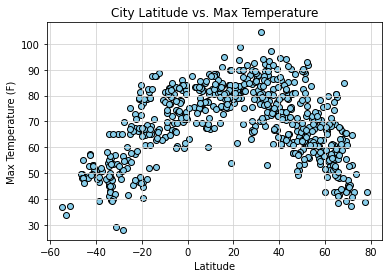

In [160]:
#Latitude vs. Temperature Plot
plt.scatter(df2["Lat"],df2["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig1.png")
plt.show()

#Conclusion: As shown in Fig 1, Latitude vs. Temperature Plot,  which includes data for 600+ cities
#The temp peaks at approx. 30-degree latitude currently.
# Temperature seems to have a clear correlation with latitude:
# farther from equator = colder. The weather is significantly 
# warmer as one approaches the equator which is the line of 0 degrees latitude. 

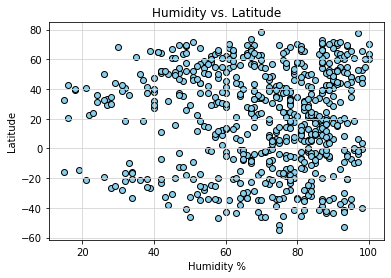

In [161]:
 # Humidity (%) vs. Latitude
    
plt.scatter(df2["Humidity"],df2["Lat"],edgecolors="black",facecolors="skyblue")
plt.title("Humidity vs. Latitude")
plt.xlabel("Humidity %")
plt.ylabel("Latitude")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig2.png")
plt.show()

#Conclusion: As you can see from the VacationPy notebook, the humidity is high across the world at this time of the year, summer, represented 
#by the numerous red-colored regions on the heatmap representing maximum or near-maximum humidity. The values seem especially high in places near the oceans. 
#As you can see from the Fig 2, there is no correlation between humidity (%) and latitude.

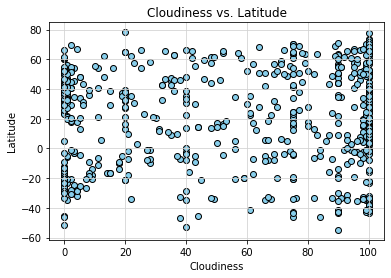

In [162]:
  # Cloudiness (%) vs. Latitude
plt.scatter(df2["Cloudiness"],df2["Lat"],edgecolors="black",facecolors="skyblue")
plt.title("Cloudiness vs. Latitude")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig3.png")
plt.show()
#Conclusion: The Cloudiness vs. Latitude plot shown below, containing data from all cities, does not seem to show a relationship between cloudiness and city 
#latitude. However,tThere seem to be some values for cloudiness that the points cluster along, noticeably 0, 20, 40, 78, 90, and 100. 

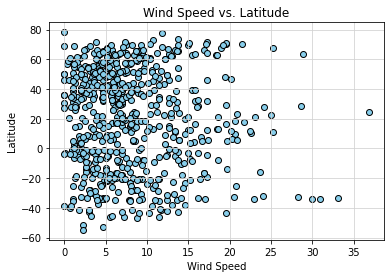

In [163]:
   # Wind Speed (mph) vs. Latitude
plt.scatter(df2["Wind Speed"],df2["Lat"],edgecolors="black",facecolors="skyblue")
plt.title("Wind Speed vs. Latitude")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig4.png")
plt.show()
#The Wind speed vs. Latitude plot, shown below for all cities, does not seem to show any relationship between wind speed and latitude. 
#Most of the wind speed values are below about 20 mph currently, with only a few values above that wind speed limit.
